Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.


Answer:

Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to form a strong predictive model.
A weak learner performs slightly better than random guessing (e.g., 55–60% accuracy). Boosting improves them by training models sequentially, where each new model focuses on the errors (misclassified samples) made by the previous ones.

Each subsequent learner gives more importance (weight) to wrongly predicted samples, allowing the ensemble to correct previous mistakes.
Finally, all models are combined (using weighted majority voting or averaging) to make a strong final prediction.

Question 2: Difference between AdaBoost and Gradient Boosting in terms of training

Answer:

Feature	AdaBoost	Gradient Boosting
Error Handling	Adjusts weights of misclassified samples.	Fits new models on the residuals (errors) of previous models.
Loss Function	Exponential loss.	Any differentiable loss (e.g., MSE, Log Loss).
Model Update	Adds weak learners sequentially with weighted votes.	Adds weak learners to minimize gradient of loss function.
Computation	Simpler and faster.	More flexible but computationally heavier.
Use Case	Good for smaller, simpler datasets.	Preferred for large or complex datasets.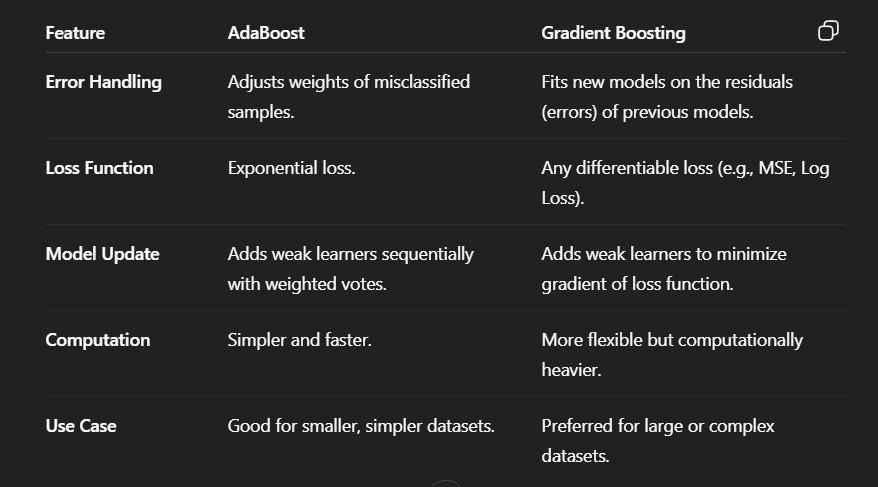


Question 3: How does regularization help in XGBoost?

Answer:

Regularization in XGBoost prevents overfitting by penalizing complex models.
It uses two parameters:

λ (lambda) → L2 regularization (penalizes large weights)

α (alpha) → L1 regularization (encourages sparsity)

These help control the tree size and leaf weights, ensuring better generalization on unseen data.

Question 4: Why is CatBoost efficient for categorical data?

Answer:

CatBoost is efficient for categorical data because it:

Uses Ordered Target Statistics (OTS) — replaces categorical values with statistically encoded numerical values while avoiding target leakage.

Employs Ordered Boosting, which reduces overfitting.

Handles categorical features natively, eliminating the need for manual encoding (like One-Hot or Label Encoding).

Question 5: Real-world applications where boosting is preferred over bagging

Answer:

Boosting is preferred when:

High predictive accuracy is required.

Data is complex and nonlinear.

Applications:

Credit scoring and fraud detection (XGBoost/CatBoost)

Disease prediction (AdaBoost)

Customer churn analysis

Ranking algorithms (e.g., search engines, recommendation systems)

Real-time ad click-through rate (CTR) prediction

Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.8004451261281281


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search for learning rate
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:49] WARNING: /w

Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.956140350877193


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


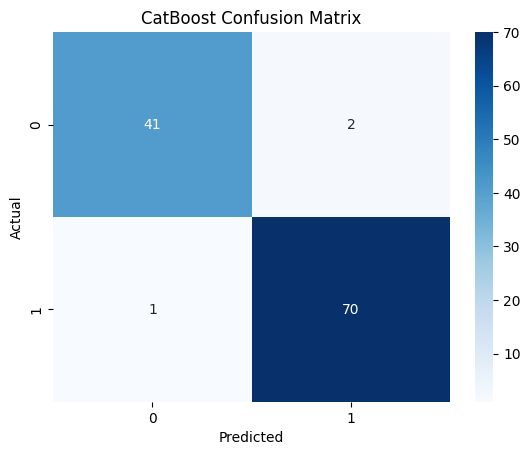

In [6]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
